In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


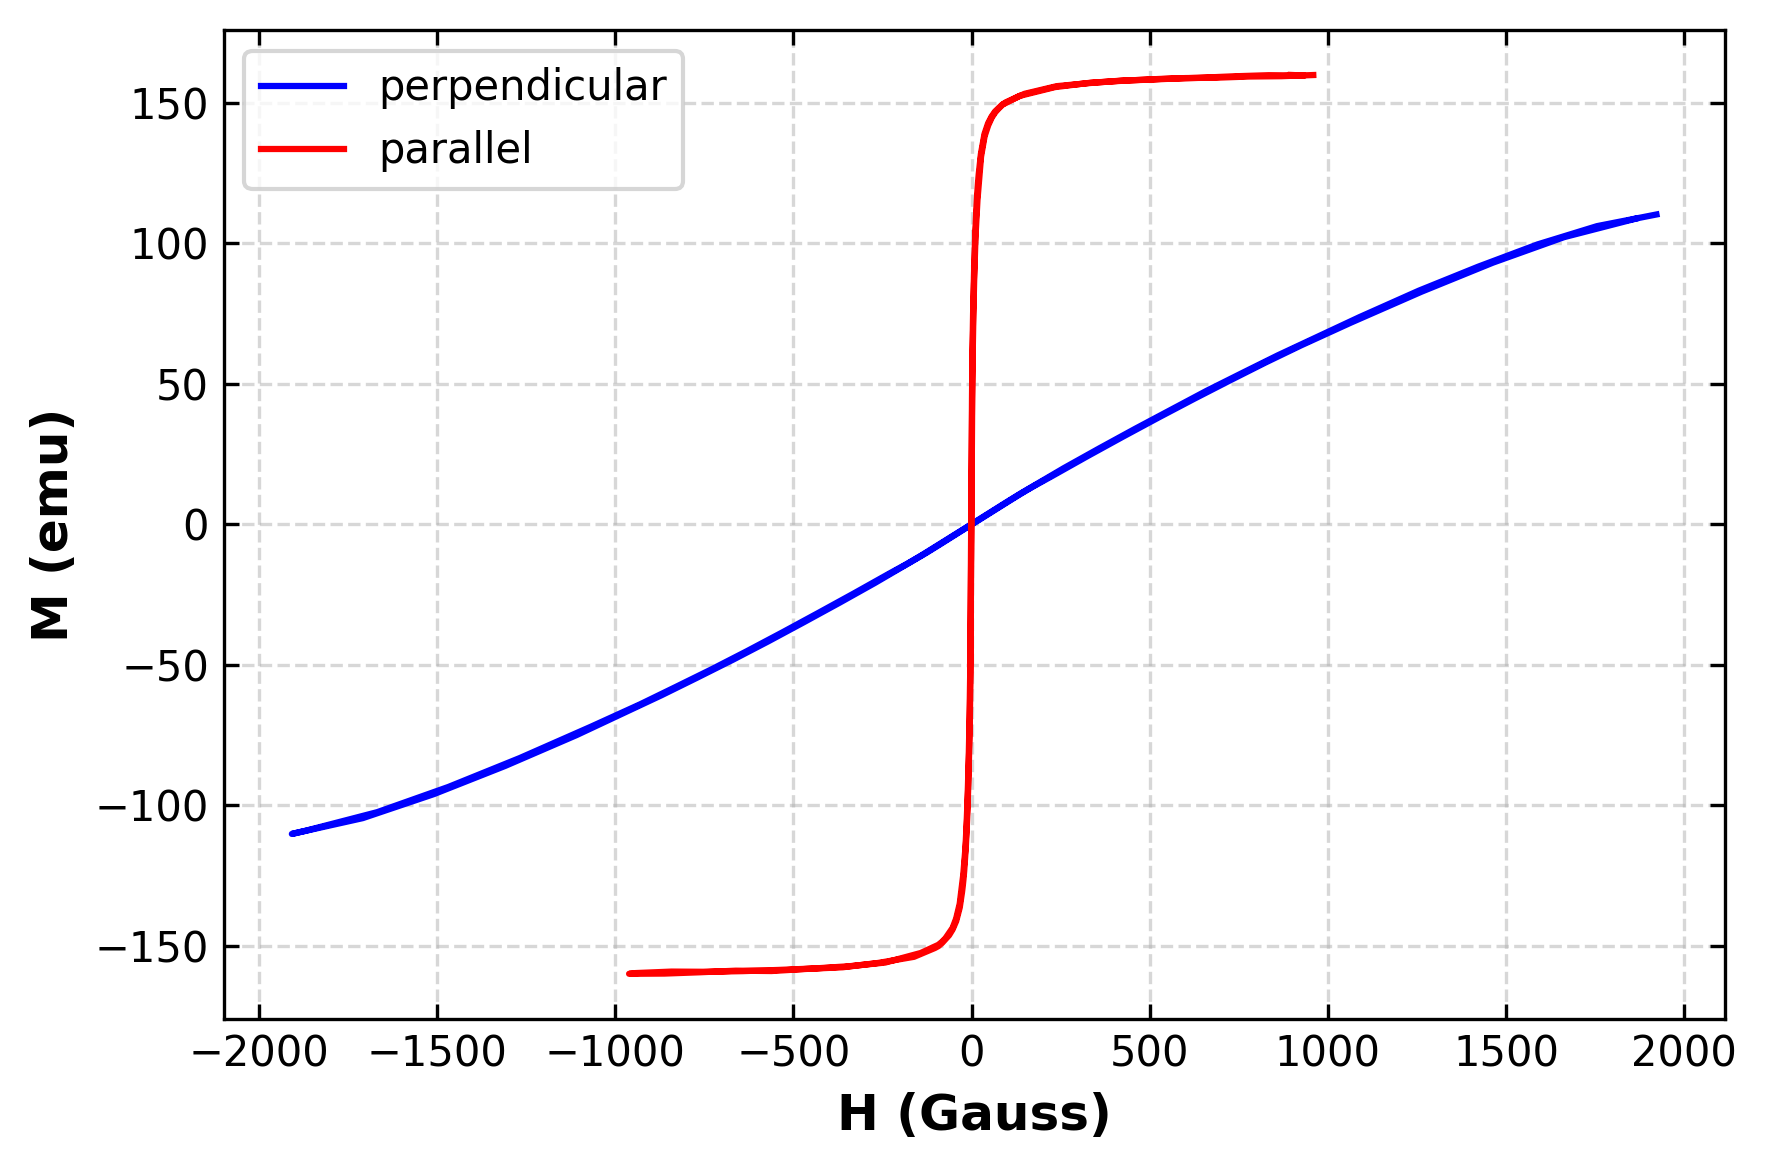

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("/gdrive/MyDrive/1_YEAR/EXPERIMENT_ELECTROMAGNETISM/hysteresis_perpendicular.txt",
                sep=r'\s*\t\s*',
                skiprows=11,
                engine='python')
df2 = pd.read_csv("/gdrive/MyDrive/1_YEAR/EXPERIMENT_ELECTROMAGNETISM/hysteresis_parallel.txt",
                sep=r'\s*\t\s*',
                skiprows=11,
                engine='python')

t =  20 * 1e-4 # cm
L =  8  * 1e-1 # cm
w = 300 * 1e-4 # cm
rho = 7.600     # g/cm^3
V = t * L * w
m = rho * V

x1 = df1["Field(G)"][:-4]
y1 = df1["Moment(emu)"][:-4] / m

x2 = df2["Field(G)"][:-4]
y2 = df2["Moment(emu)"][:-4] / m

plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x1, y1, color='blue', label="perpendicular", linewidth=1.5, markersize=4)
plt.plot(x2, y2, color='red', label="parallel", linewidth=1.5, markersize=4)
plt.xlabel("H (Gauss)", fontsize=12, fontweight='bold')
plt.ylabel("M (emu)", fontsize=12, fontweight='bold')
plt.tick_params(direction='in', top=True, right=True)  # Ticks on all sides
plt.grid(True, linestyle='--', alpha=0.5)               # Optional grid
plt.tight_layout()
plt.legend()
plt.show()

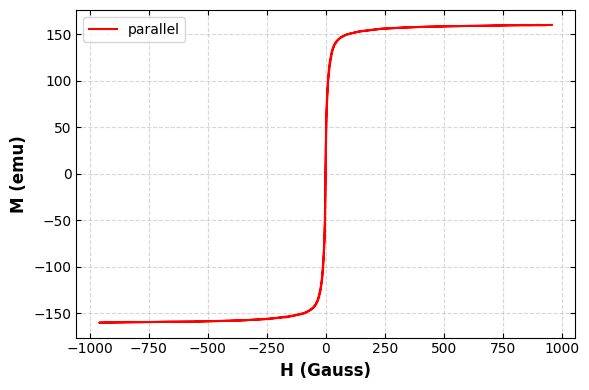

In [ ]:


plt.figure(figsize=(6, 4), dpi=100)
# plt.plot(x1, y1, color='blue', label="perpendicular", linewidth=1.5, markersize=4)
plt.plot(x2, y2, color='red', label="parallel", linewidth=1.5, markersize=4)
plt.xlabel("H (Gauss)", fontsize=12, fontweight='bold')
plt.ylabel("M (emu)", fontsize=12, fontweight='bold')
plt.tick_params(direction='in', top=True, right=True)  # Ticks on all sides
plt.grid(True, linestyle='--', alpha=0.5)               # Optional grid

zoom = 0.04
zoomx = 1
# plt.xlim(-zoomx, zoomx)
# plt.ylim(-zoom, zoom)
plt.tight_layout()
plt.legend()


In [ ]:

np.max(y2)

159.86677631578945

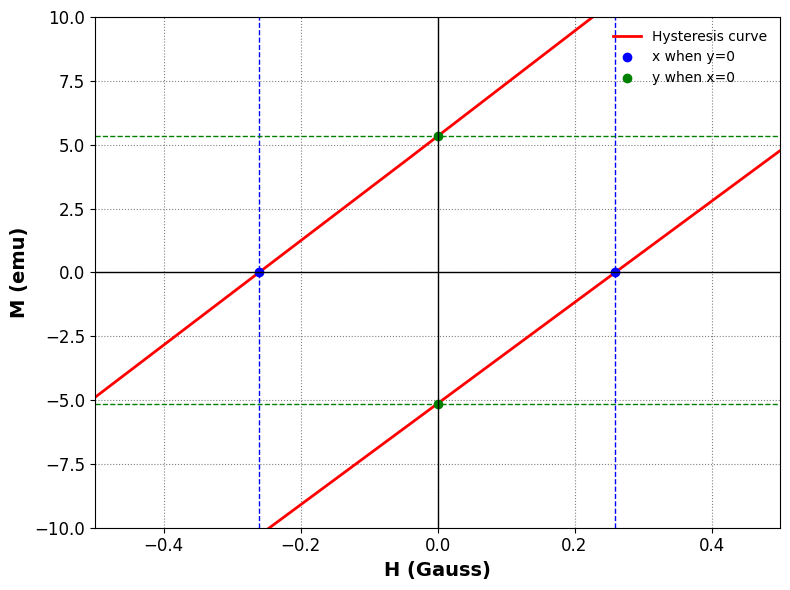

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x2 = df2["Field(G)"][:-5] + 0.92
y2 = df2["Moment(emu)"][:-5] / m


x_zero_crossings = []
y_zero_crossings = []

# Cari semua titik y = 0 (perpotongan sumbu M)
for i in range(len(y2) - 1):
    if y2[i] * y2[i+1] < 0:
        fx = interp1d(y2[i:i+2], x2[i:i+2])
        x_at_y0 = fx(0.0)
        x_zero_crossings.append(float(x_at_y0))

# Cari semua titik x = 0 (perpotongan sumbu H)
for i in range(len(x2) - 1):
    if x2[i] * x2[i+1] < 0:
        fy = interp1d(x2[i:i+2], y2[i:i+2])
        y_at_x0 = fy(0.0)
        y_zero_crossings.append(float(y_at_x0))

# Gaya mirip Origin
plt.figure(figsize=(8, 6))
plt.plot(x2, y2, color='red', linewidth=2, label='Hysteresis curve')

# Titik & garis y=0
for x0 in x_zero_crossings:
    plt.axvline(x=x0, color='blue', linestyle='--', linewidth=1)
    plt.plot(x0, 0, 'o', color='blue', markersize=6, label='x when y=0')

# Titik & garis x=0
for y0 in y_zero_crossings:
    plt.axhline(y=y0, color='green', linestyle='--', linewidth=1)
    plt.plot(0, y0, 'o', color='green', markersize=6, label='y when x=0')

# Sumbu utama
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

# Gaya label dan grid
plt.xlabel("H (Gauss)", fontsize=14, fontweight='bold')
plt.ylabel("M (emu)", fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, color='gray')

# Hindari label duplikat di legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, loc='best', frameon=False)

plt.xlim(-0.5, 0.5)
plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


In [ ]:
y_zero_crossings

[5.3272779489882085, -5.141594337184964]

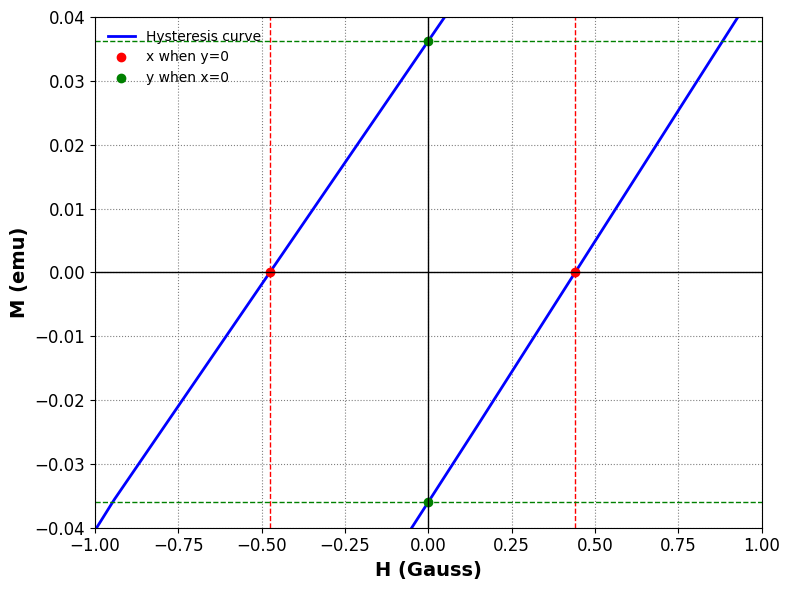

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x_zero_crossings = []
y_zero_crossings = []

# Cari semua titik y = 0 (perpotongan sumbu M)
for i in range(len(y1) - 1):
    if y1[i] * y1[i+1] < 0:
        fx = interp1d(y1[i:i+2], x1[i:i+2])
        x_at_y0 = fx(0.0)
        x_zero_crossings.append(float(x_at_y0))

# Cari semua titik x = 0 (perpotongan sumbu H)
for i in range(len(x1) - 1):
    if x1[i] * x1[i+1] < 0:
        fy = interp1d(x1[i:i+2], y1[i:i+2])
        y_at_x0 = fy(0.0)
        y_zero_crossings.append(float(y_at_x0))

# Gaya mirip Origin
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, color='blue', linewidth=2, label='Hysteresis curve')

# Titik & garis y=0
for x0 in x_zero_crossings:
    plt.axvline(x=x0, color='red', linestyle='--', linewidth=1)
    plt.plot(x0, 0, 'o', color='red', markersize=6, label='x when y=0')

# Titik & garis x=0
for y0 in y_zero_crossings:
    plt.axhline(y=y0, color='green', linestyle='--', linewidth=1)
    plt.plot(0, y0, 'o', color='green', markersize=6, label='y when x=0')

# Sumbu utama
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

# Gaya label dan grid
plt.xlabel("H (Gauss)", fontsize=14, fontweight='bold')
plt.ylabel("M (emu)", fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, color='gray')

# Hindari label duplikat di legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, loc='best', frameon=False)

plt.xlim(-zoomx, zoomx)
plt.ylim(-zoom, zoom)
plt.tight_layout()
plt.show()


In [ ]:
x_zero_crossings

[-0.47542317803777046, 0.44078114252204414]

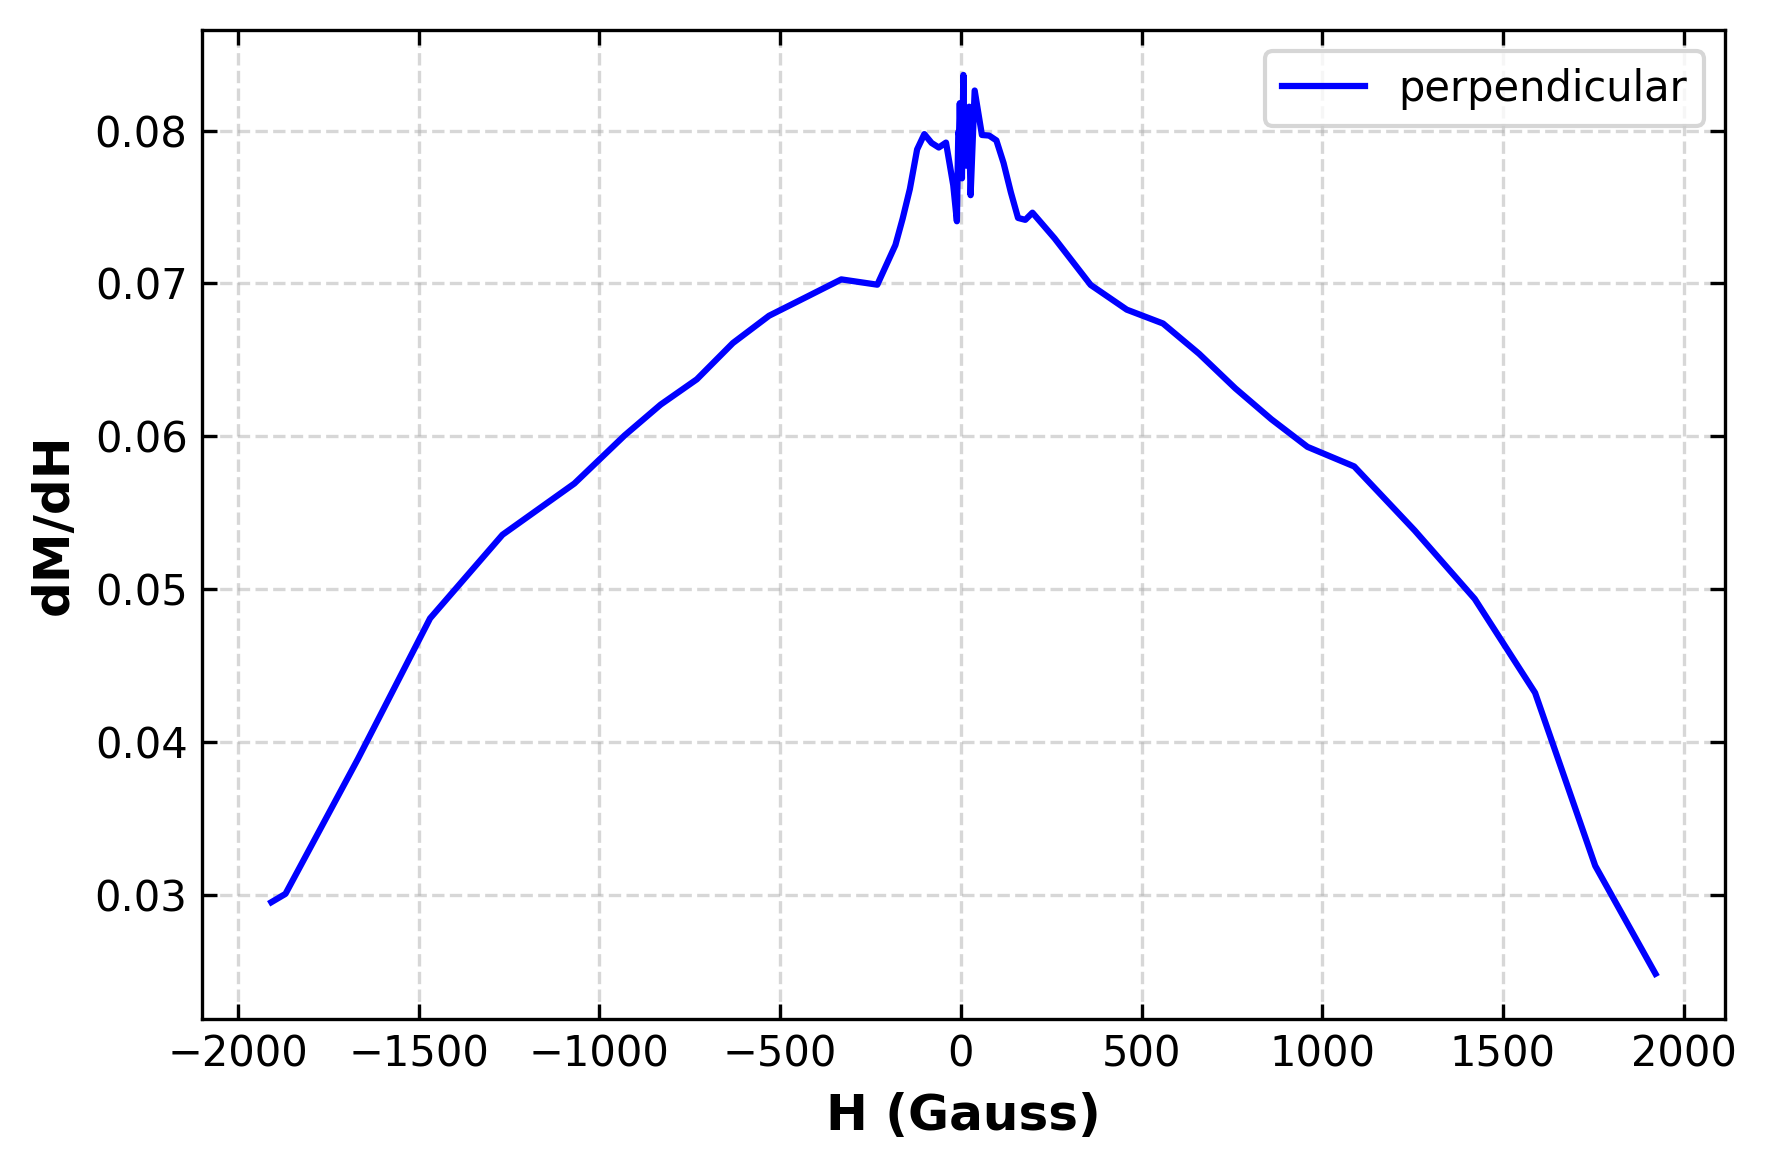

In [ ]:
n = - 63

# Calculate dy/dx
dy_dx1 = np.gradient(y1[:n], x1[:n])

# Plot original and derivative
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x1[:n], dy_dx1, label="perpendicular", color='blue', linewidth=1.5)

# Styling like Origin
plt.xlabel("H (Gauss)", fontsize=12, fontweight='bold')
plt.ylabel("dM/dH", fontsize=12, fontweight='bold')
plt.tick_params(direction='in', top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
 np.max(dy_dx2)

np.float64(20.52112723811043)

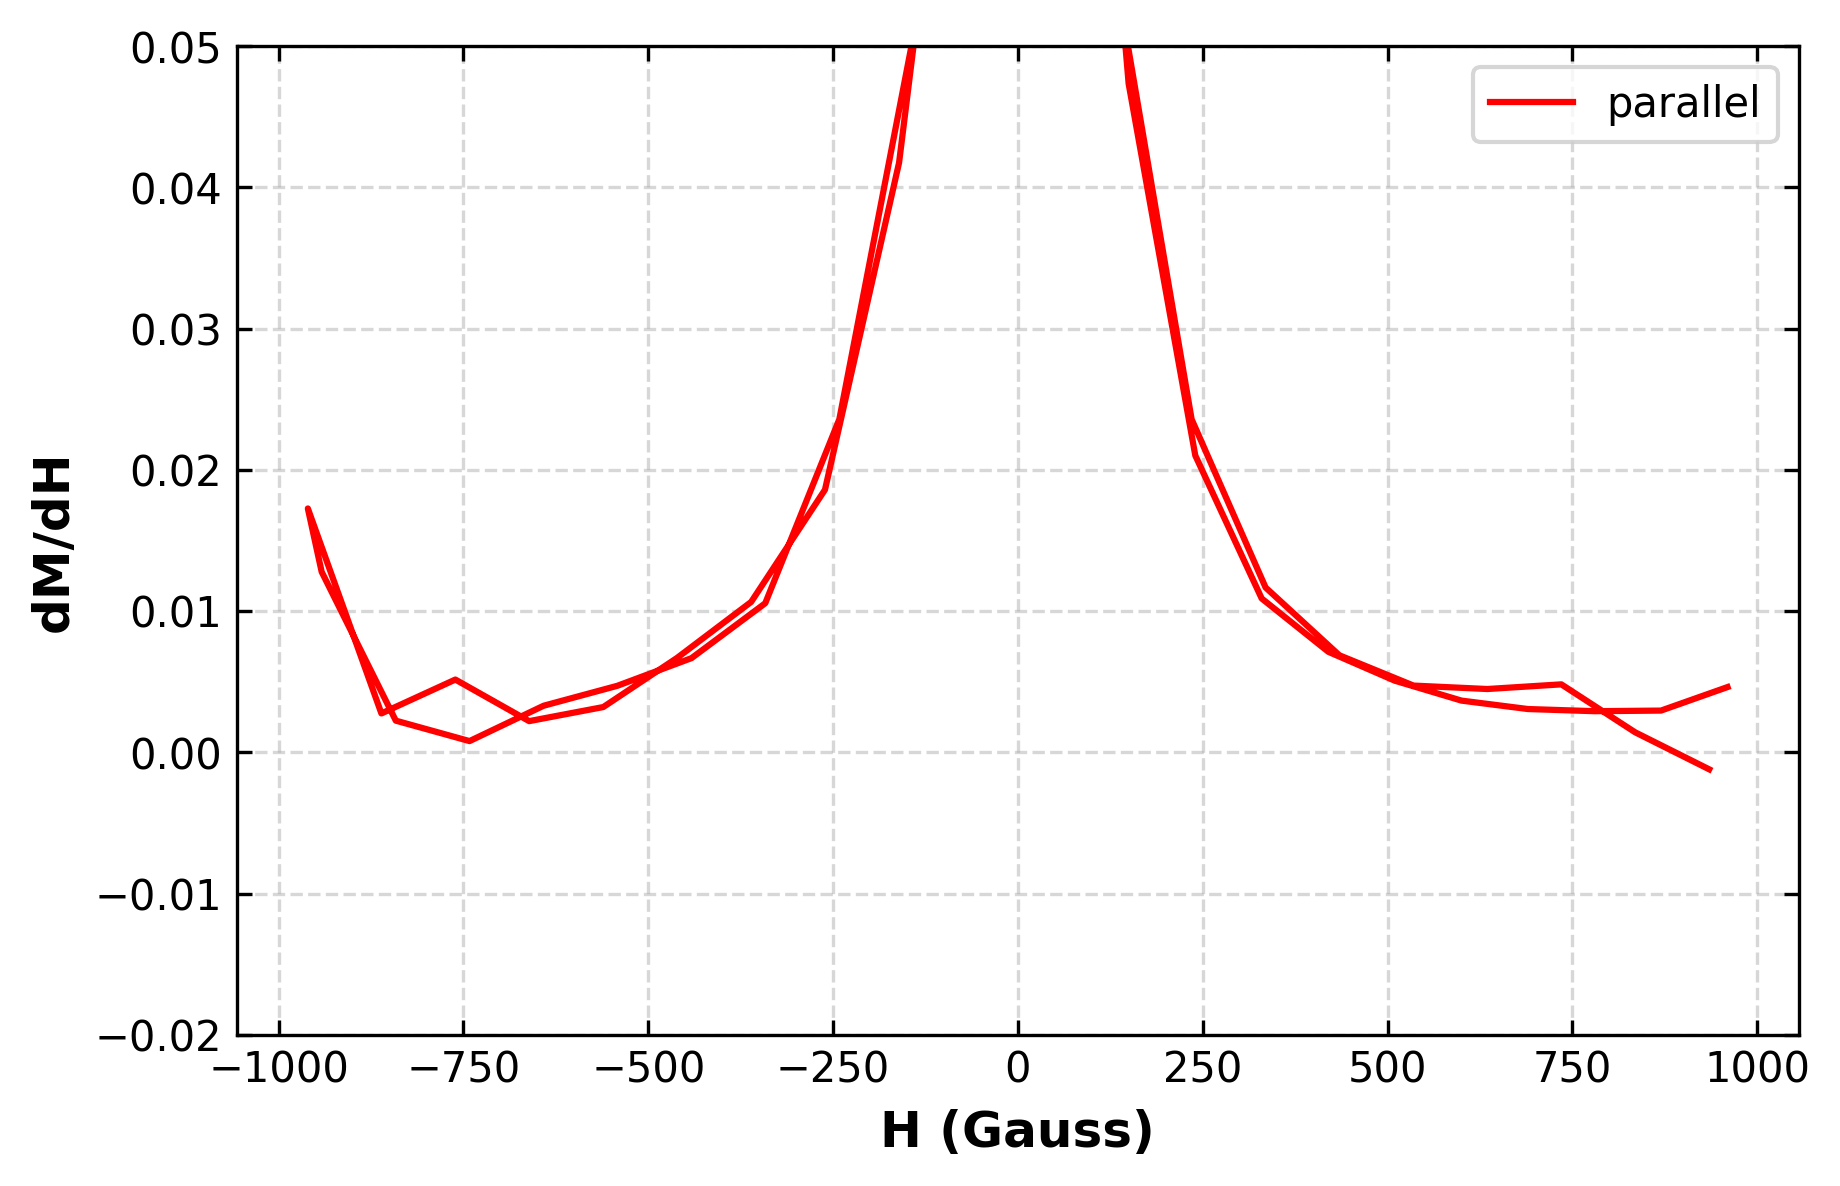

In [ ]:
dy_dx2 = np.gradient(y2, x2)

# Plot original and derivative
plt.figure(figsize=(6, 4), dpi=300)
# plt.plot(x1[:n], dy_dx1, label="perpendicular", color='blue', linewidth=1.5)
plt.plot(x2, dy_dx2, label="parallel", color='red', linewidth=1.5)

# Styling like Origin
plt.xlabel("H (Gauss)", fontsize=12, fontweight='bold')
plt.ylabel("dM/dH", fontsize=12, fontweight='bold')
plt.tick_params(direction='in', top=True, right=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(-0.02, 0.05)
plt.legend()
plt.show()

In [ ]:

# Ambil indeks di mana dy_dx2 < 0.1
indeks = np.where(dy_dx2 < 0.1)[0]

# Ambil nilai x2 dan y2 yang sesuai dengan indeks tersebut
x2_terpilih = x2[indeks]
y2_terpilih = y2[indeks]

y2_terpilih = np.abs(y2_terpilih)
np.mean(y2_terpilih)

np.float64(157.05143479888747)

In [ ]:
np.min(x2)

-960.493